# Gradient of Image

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [2]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [3]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
h, w, c = I0.shape
num_row     = h
num_column  = w
num_channel = c
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [4]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# h,w,c = I0.shape
# I= np.zeros((h, w), np.uint8)

# I = I0


# for y in range(0, h):
#     for x in range(0, w):
#         b = I.item(y, x, 0)
#         g = I.item(y, x, 1)
#         r = I.item(y, x, 2)

#         gray = (int(b) + int(g) + int(r)) /3.0
        
#         if gray >255:
#             gray = 255

#         I.itemset(y,x,gray)

# h1,w1=I.shape
# num_row = h1
# num_column = w1  처음시도한거 for문은 최대한제거

I = I0[:,:,0]/3 + I0[:,:,1]/3 + I0[:,:,2]/3


h1, c1 =I.shape
num_row = h1
num_column = c1

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)


number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#



I = (I-I.min())/(I.max() - I.min())

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [6]:

def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_0=np.zeros((1,w))

    I_1 = np.vstack([I,I_0])
    I_2 = np.vstack([I_0,I])

    I_3=I_1-I_2
    I_3=I_3[1:-1,:]

    D=np.vstack([I_3,I_0])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [7]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_0=np.zeros((1,w))

    I_1 = np.vstack([I,I_0])
    I_2 = np.vstack([I_0,I])

    I_3=I_1-I_2
    I_3=I_3[1:-1,:]

    D=np.vstack([I_0,I_3])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [8]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_0=np.zeros((2,w))
    I_1 = np.vstack([I,I_0])
    I_2 = np.vstack([I_0,I])
    I_3=I_1-I_2
    I_3=I_3[2:-2,:]

    I_4=compute_derivative_x_forward(I)
    I_4=I_4[:1,:]
    I_5=compute_derivative_x_backward(I)
    I_5=I_5[-1:,:]

    I_3= np.vstack([I_4,I_3])
    D= np.vstack([I_3,I_5])/2
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [9]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_0 = np.zeros((h,1))
    I_1 = np.hstack([I, I_0])
    I_2 = np.hstack([I_0, I])
    I_3 = I_1-I_2
    I_3 = I_3[:,1:-1]   

    D=np.hstack([I_3,I_0])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [10]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    I_0=np.zeros((h,1))

    I_1 = np.hstack([I,I_0])
    I_2 = np.hstack([I_0,I])

    I_3=I_1-I_2
    I_3=I_3[:,1:-1]

    D=np.hstack([I_0,I_3])
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [11]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_0=np.zeros((h,2))
    I_1 = np.hstack([I,I_0])
    I_2 = np.hstack([I_0,I])
    I_3=I_1-I_2
    I_3=I_3[:,2:-2]

    I_4=compute_derivative_y_forward(I)
    I_4=I_4[:,:1]
    I_5=compute_derivative_y_backward(I)
    I_5=I_5[:,-1:]

    I_3= np.hstack([I_4,I_3])
    D= np.hstack([I_3,I_5])/2
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [12]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    aa1 = compute_derivative_y_central(I)
    bb1 = compute_derivative_x_central(I)
    norm_gradient = aa1*aa1+bb1*bb1
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [13]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [14]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [15]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [16]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [17]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [18]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [19]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [20]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [21]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [22]:

def function_result_10():
  
    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()
    

In [23]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [24]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [25]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [26]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [27]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [28]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [29]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


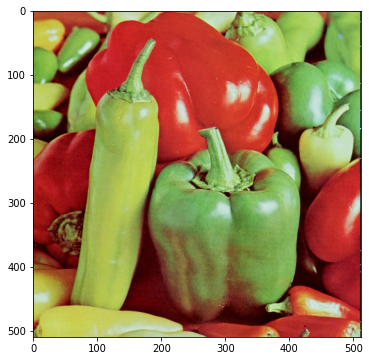

**************************************************
## [RESULT 02]
**************************************************


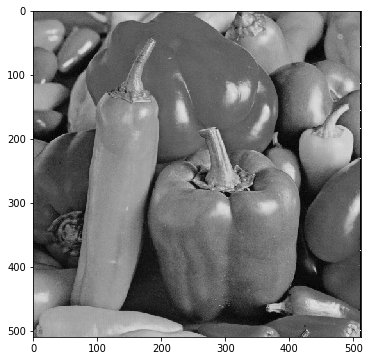

**************************************************
## [RESULT 03]
**************************************************


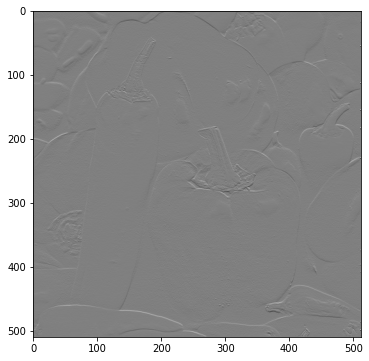

**************************************************
## [RESULT 04]
**************************************************


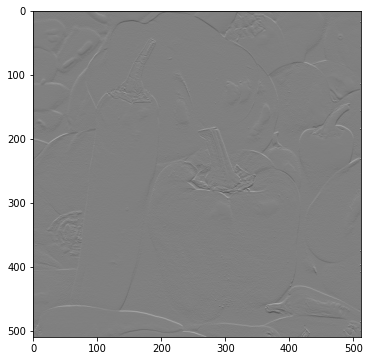

**************************************************
## [RESULT 05]
**************************************************


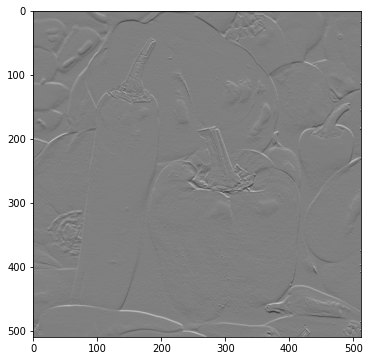

**************************************************
## [RESULT 06]
**************************************************


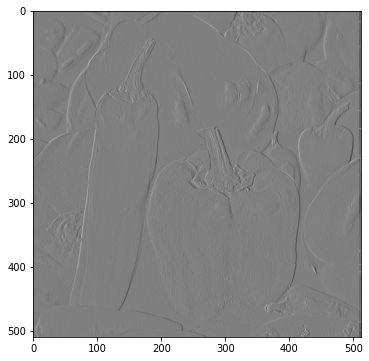

**************************************************
## [RESULT 07]
**************************************************


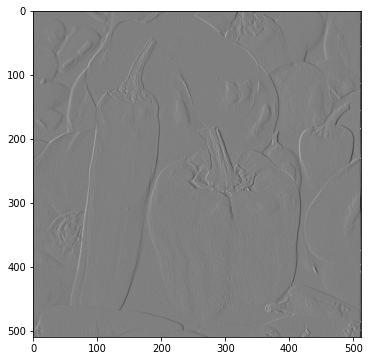

**************************************************
## [RESULT 08]
**************************************************


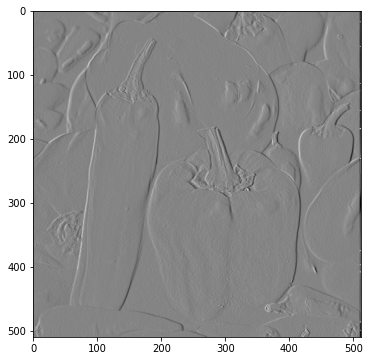

**************************************************
## [RESULT 09]
**************************************************


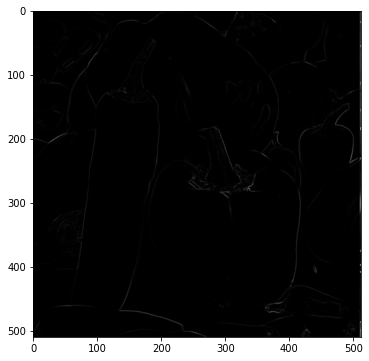

**************************************************
## [RESULT 10]
**************************************************


ValueError: Invalid vmin or vmax

<Figure size 576x432 with 2 Axes>

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.007853403141361293
value2 =  0.0
value3 =  -0.005235602094240843
value4 =  0.011780104712041883
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.002617801047120419
value3 =  0.01570680628272253
value4 =  -0.01308900523560208
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.003926701570680646
value2 =  0.0013089005235602095
value3 =  0.005235602094240843
value4 =  -0.0006544502617800985
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.035340314136125706
value2 =  0.0
value3 =  -0.01701570680628267
value4 =  -5.551115123125783e-17
**************************************************
## [RESULT 15]
*************

In [30]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)